# Machine Learning with Python using scikit Learn

Python has several packages for machine learning. We will use the most popular package:
[scikit learn](https://scikit-learn.org)

See scikit learn's section on [supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

This introduction covers the use of scikit learn for:
* Training/testing
* Cross validation
* Decision trees
* K-nearest neighbors
* Support vector machines
* Naive Bayes classifier
* Neural networks (Multi-layer perceptrons)

In [3]:
%pip install -q pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# data
from sklearn.datasets import load_iris

# learner
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# make plots larger
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15

## Load data

The iris dataset comes with scikit learn. It contains four measurements for 150 flowers of three subspecies of the iris family. The class attribute is the subspecies. Details can be found on the [Wikipedia page for the iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). We load the data as a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe). Dataframes are similar to spreadsheets or SQL tables (each column can have its own data type) and are used often to represent data for machine learning.

In [5]:
iris = load_iris(as_frame = True)
iris['frame']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X = iris['data']
y = iris['target']

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

Class distribution

In [8]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [9]:
y.value_counts(normalize = True)

target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Visualize the dataframe using a scatter plot matrix.

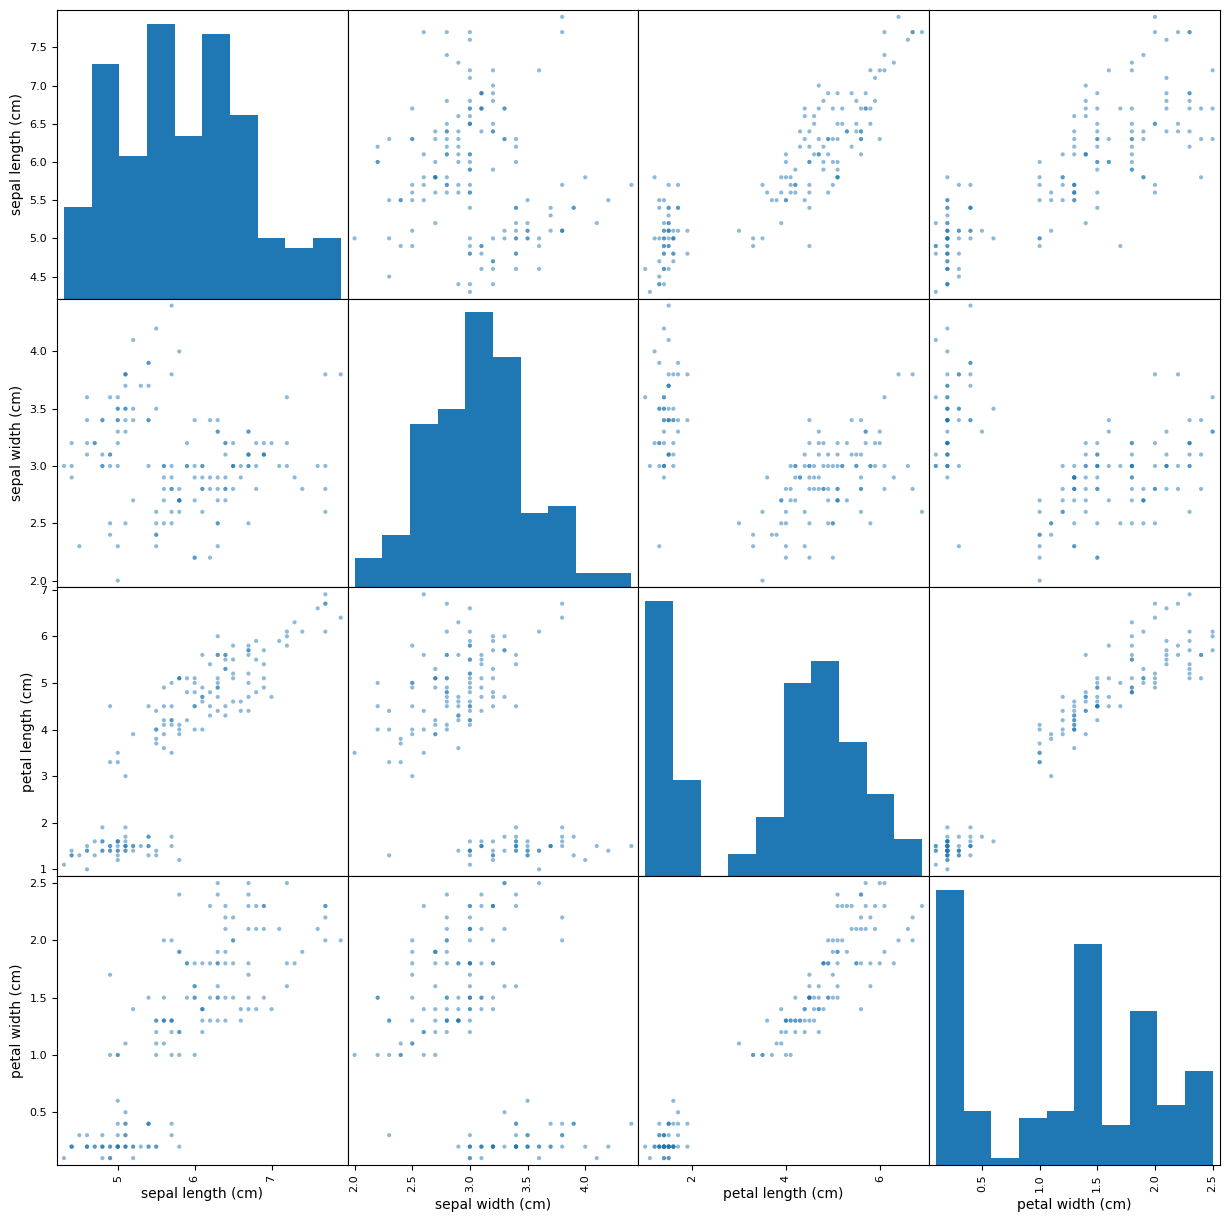

In [10]:
plt = pd.plotting.scatter_matrix(X)

 ## Create a training and test set
 
 Split the data into test data used to learn the model and test data to evaluate the model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
93,5.0,2.3,3.3,1.0
57,4.9,2.4,3.3,1.0
44,5.1,3.8,1.9,0.4
16,5.4,3.9,1.3,0.4
...,...,...,...,...
58,6.6,2.9,4.6,1.3
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
4,5.0,3.6,1.4,0.2


In [12]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
34,4.9,3.1,1.5,0.2
36,5.5,3.5,1.3,0.2
113,5.7,2.5,5.0,2.0
14,5.8,4.0,1.2,0.2
115,6.4,3.2,5.3,2.3
145,6.7,3.0,5.2,2.3
47,4.6,3.2,1.4,0.2
127,6.1,3.0,4.9,1.8
101,5.8,2.7,5.1,1.9


## Learn a decision tree on the training data

scikit-learn uses an optimized version of the CART algorithm. Learning a model in scikit-learn consists of initializing the learner (with hyperparameters, if any) and calling the fit function with the training data. For details, see https://scikit-learn.org/stable/modules/tree.html.

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

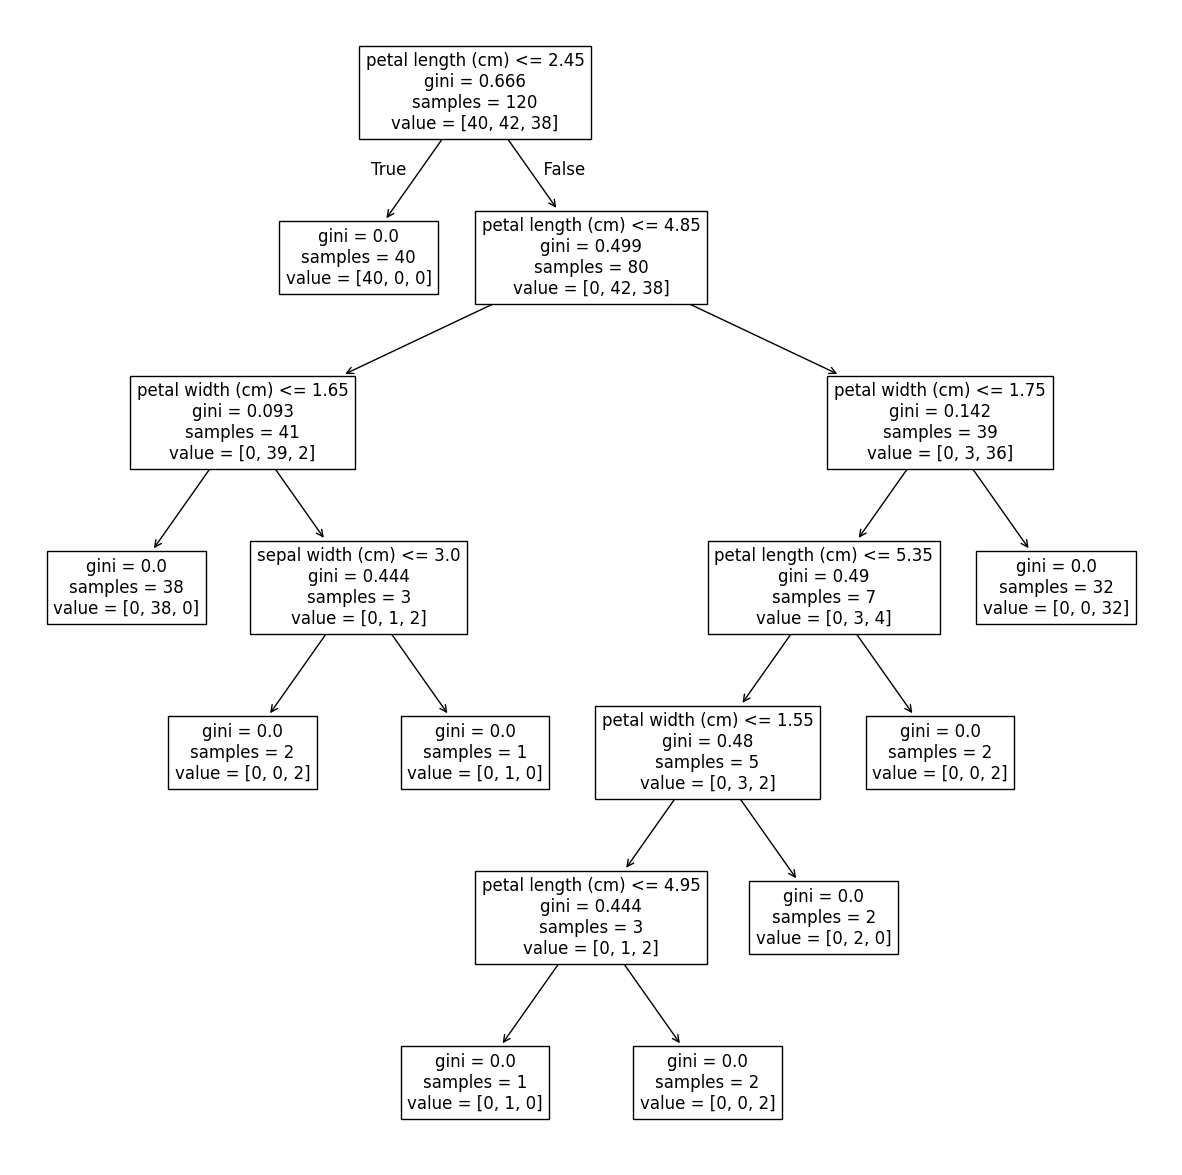

In [14]:
pl = tree.plot_tree(clf, feature_names = list(X_train.columns)) 

In [15]:
print(tree.export_text(clf, feature_names = list(X_train.columns)))

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.85
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.00
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.85
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 5.35
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  5.35
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



## Test on the test data

It is important that the test data was not seen by the algorithm before. The goal is to estimate the generalization error/accuracy.

In [16]:
pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

y_test:	 [0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1]
pred:	 [np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]


Confusion matrix with count. Rows are the true/test labels and columns are the predicted labels. Counts on the diagonal are correct predictions.

In [17]:
confusion_matrix(pred, y_test)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]])

Calculate accuracy on the test data

In [18]:
accuracy_score(pred, y_test)

1.0

## Hyperparameters: Create a decision tree with restricted depth

Hyperparameters (together with other parameters) can be found at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.

Information about automatic hyperparameter tuning using search can be found here: https://scikit-learn.org/stable/modules/grid_search.html.

We change the  hyperparameter `max_depth` from the default value of `None` (unlimited) to 3.

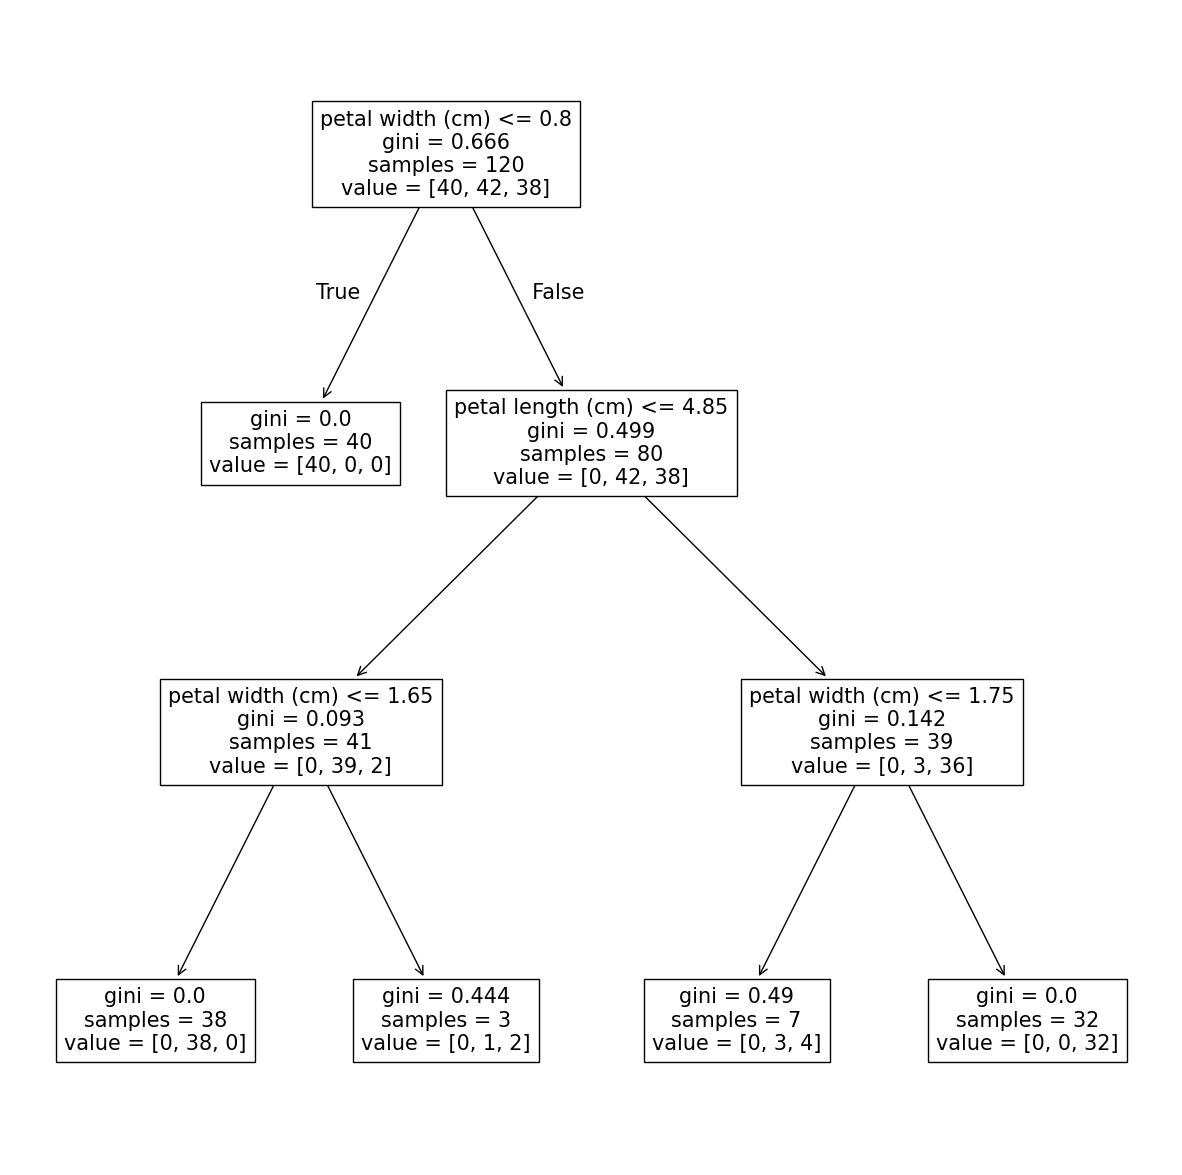

In [19]:
clf2 = tree.DecisionTreeClassifier(max_depth = 3)
clf2 = clf2.fit(X_train, y_train)
pl = tree.plot_tree(clf2, feature_names = list(X_train.columns))

## Cross-validation

The goal of cross-validation is to get a more robust estimate for the model accuracy on unseen evaluation data while using as much of the data as possible.

The data is randomly split into `cv` folds and then the model is learned (using the model's fit function) `cv` times, each time it is trained on `cv`-1 folds and evaluated against the remaining fold. Therefore, each data point is used at least once to evaluate the model. The procedure results in `cv` many scores. The final estimate the average. The scores are drawn from a sampling distribution and, therefore, standard statistics including confidence intervals and significance tests can be used. 

Cross-validation is often used for hyperparameter tuning or model selection (it splits the training set repeatedly into training and validation data). Here we do not perform model selection, and we use cross-validation to estimate the model accuracy on a test set.

In [20]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv = 10)
scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [21]:
print("Cross validated accuracy:", scores.mean())

Cross validated accuracy: 0.9533333333333334


## Other Classification Models

Many different models are implemented in scikit learn (see: https://scikit-learn.org/stable/supervised_learning.html).

Each model class has its own model bias. Some examples are shown below.

### Naive Bayes Classifier

The features are continuous, so we use a Gaussian Naive Bayes Classifier.
See: https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))
accuracy_score(pred, y_test)

y_test:	 [0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1]
pred:	 [np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]


0.9666666666666667

In [23]:
scores = cross_val_score(clf, X, y, cv = 10)
print("Cross validated accuracy:", scores.mean())

Cross validated accuracy: 0.9533333333333334


### K-Nearest Neighbors Classifier 

Classify a new example by voting using the labels of the $k$ nearest neighbors (see: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification). 

__Scaling data:__ The $k$-nearest neighbor classifier uses Euclidean distance between the data points to determine the neighbors. It is often necessary to scale the data to avoid the problem that features with larger ranges dominate the distance calculation. Scaling can also be done more conveniently in scikit learn using `pipelines`  (see: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# scale to z-scores (for each feature: subtract the mean and divide by the standard deviation of the column)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
display(pd.DataFrame(X_train_scaled))

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train_scaled, y_train)

pred = clf.predict(X_test_scaled)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))
accuracy_score(pred, y_test)

,0,1,2,3
0,0.586808,-0.546730,0.791242,0.426334
1,-1.002463,-1.693717,-0.248346,-0.245058
2,-1.124715,-1.464319,-0.248346,-0.245058
3,-0.880211,1.747243,-1.056915,-1.050728
4,-0.513457,1.976640,-1.403445,-1.050728
...,...,...,...,...
115,0.953562,-0.317333,0.502468,0.157777
116,2.176078,-0.087936,1.657566,1.232004
117,1.809323,-0.317333,1.484302,0.829169
118,-1.002463,1.288448,-1.345690,-1.319285


y_test:	 [0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1]
pred:	 [np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]


0.9666666666666667

In [25]:
scores = cross_val_score(clf, scaler.transform(X), y, cv = 10)
print("Cross validated accuracy:", scores.mean())

Cross validated accuracy: 0.9533333333333334


### Support Vector Machines

There are other kernel functions to learn non-linear decision boundaries (see: https://scikit-learn.org/stable/modules/svm.html).

In [26]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))
accuracy_score(pred, y_test)

y_test:	 [0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1]
pred:	 [np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]


1.0

In [27]:
scores = cross_val_score(clf, X, y, cv = 10)
print("Cross validated accuracy:", scores.mean())

Cross validated accuracy: 0.9733333333333334


### Neural Networks 

Use multi-layer perceptron (MLP) for classification (see: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification).

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# scale features for the artificial neural network to range [0,1]
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(pd.DataFrame(X_train_scaled).describe())

clf = MLPClassifier(solver='lbfgs',              # optimization algorithm
                    alpha=1e-5,                  # L2 regularization 
                    hidden_layer_sizes=(10),     # one hidden layer with 10 neurons 
                    max_iter = 1000)             # max. number of iterations

clf.fit(X_train_scaled, y_train)

pred = clf.predict(X_test_scaled)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))
accuracy_score(pred, y_test)

                0           1           2           3
count  120.000000  120.000000  120.000000  120.000000
mean     0.447059    0.471970    0.478947    0.451042
std      0.241593    0.198979    0.305038    0.311602
min      0.000000    0.000000    0.000000    0.000000
25%      0.235294    0.363636    0.105263    0.083333
50%      0.411765    0.454545    0.570175    0.500000
75%      0.617647    0.602273    0.719298    0.708333
max      1.000000    1.000000    1.000000    1.000000
y_test:	 [0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1]
pred:	 [np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]


0.9666666666666667

In [29]:
scores = cross_val_score(clf, scaler.transform(X), y, cv = 10)
print("Cross validated accuracy:", scores.mean())


Cross validated accuracy: 0.9666666666666668
